<a href="https://colab.research.google.com/github/UW-geophysics-edu/ess-412-512-intro2seismology/blob/main/Global_Phases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Phases

This notebook will explore gobal propagation of rays as predicted from 1D Earth models and observed in data.

By Marine Denolle (mdenolle@uw.edu) with help of Obspy tutorials and AI

## Ray Tracing

Playbook to solve for ray geometry in 2D vertically varying structure and 3D global Earth. We will use the TauP in Obspy, a python project.



https://docs.obspy.org/packages/obspy.taup.html


In [1]:
## Install dependencies (for Google Colab)
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.37
    Uninstalling SQLAlchemy-2.0.37:
      Successfully uninstalled SQLAlchemy-2.0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [2]:
## Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import obspy


In [3]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times(source_depth_in_km=55,
                                  distance_in_degree=67)
print(arrivals)

28 arrivals
	P phase arrival at 647.041 seconds
	pP phase arrival at 662.233 seconds
	sP phase arrival at 668.704 seconds
	PcP phase arrival at 674.865 seconds
	PP phase arrival at 794.992 seconds
	PKiKP phase arrival at 1034.098 seconds
	pPKiKP phase arrival at 1050.528 seconds
	sPKiKP phase arrival at 1056.721 seconds
	S phase arrival at 1176.948 seconds
	pS phase arrival at 1195.508 seconds
	SP phase arrival at 1196.830 seconds
	sS phase arrival at 1203.129 seconds
	PS phase arrival at 1205.421 seconds
	SKS phase arrival at 1239.090 seconds
	SKKS phase arrival at 1239.109 seconds
	ScS phase arrival at 1239.512 seconds
	SKiKP phase arrival at 1242.388 seconds
	pSKS phase arrival at 1260.314 seconds
	sSKS phase arrival at 1266.921 seconds
	SS phase arrival at 1437.427 seconds
	PKIKKIKP phase arrival at 1855.271 seconds
	SKIKKIKP phase arrival at 2063.564 seconds
	PKIKKIKS phase arrival at 2069.756 seconds
	SKIKKIKS phase arrival at 2277.857 seconds
	PKIKPPKIKP phase arrival at 2353.93

In [4]:
arrivals = model.get_travel_times(source_depth_in_km=100,
                                  distance_in_degree=45,
                                  phase_list=["P", "PSPSPS"])
print(arrivals)

3 arrivals
	P phase arrival at 485.210 seconds
	PSPSPS phase arrival at 4983.041 seconds
	PSPSPS phase arrival at 5799.249 seconds


In [5]:
arrivals = model.get_ray_paths(500, 130)
arrivals = model.get_pierce_points(500, 130)

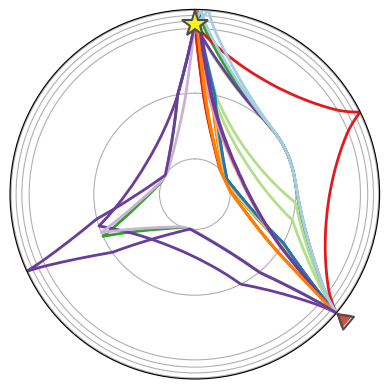

In [6]:
arrivals = model.get_ray_paths(
    source_depth_in_km=500, distance_in_degree=130, phase_list=["ttbasic"])
ax = arrivals.plot_rays()

In [7]:
arrivals = model.get_ray_paths(source_depth_in_km=500,
                               distance_in_degree=130,
                               phase_list=["Pdiff", "Sdiff",
                                           "pPdiff", "sSdiff"])

In [ ]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 9))
ax = plot_travel_times(source_depth=10, phase_list=["P", "S", "PP"],
                       ax=ax, fig=fig)

## Student exercise

Download data from a large earthquakes.

You can find earthquakes on the USGS website: https://www.usgs.gov/programs/earthquake-hazards

Pick a large earthquakes, get his date. Another way to collect earthquake information data is by querying an obspy earthquake catalog

In [29]:
from obspy.clients.fdsn import Client
client = Client("IRIS")

eq = client.get_events(starttime=obspy.UTCDateTime("2023-01-01T00:00:00"),
                       endtime=obspy.UTCDateTime("2025-01-01T00:00:00"),
                       minmagnitude=7.5)

print(eq)
# find the largest magnitude
mags = [e.magnitudes[0].mag for e in eq]
idx = np.argmax(mags)
eqmax = eq[idx]
starttime = obspy.UTCDateTime(eqmax.origins[0].time)  # Earthquake origin time
endtime = starttime + 3*3600  # End time (3 hour after origin)

7 Event(s) in Catalog:
2024-01-01T07:10:09.474000Z | +37.489, +137.264 | 7.5  mww
2023-12-02T14:37:05.568000Z |  +8.487, +126.351 | 7.6  mww
2023-05-19T02:57:05.349000Z | -23.190, +170.734 | 7.7  mww
2023-05-10T16:02:00.334000Z | -15.628, -174.493 | 7.6  mww
2023-02-06T10:24:49.258000Z | +38.023,  +37.203 | 7.5  mww
2023-02-06T01:17:34.362000Z | +37.225,  +37.021 | 7.8  mww
2023-01-09T17:47:35.057000Z |  -7.064, +130.004 | 7.6  mww
2023-02-06T01:17:34.362000Z


### get station information


In [64]:
inv = client.get_stations(network="II",station="*",channel="BHZ", starttime=starttime, endtime=endtime)
print(inv)

Inventory created at 2025-02-10T13:36:29.201500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-02-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (44):
			II.AAK (Ala Archa, Kyrgyzstan)
			II.ABPO (Ambohimpanompo, Madagascar)
			II.ALE (Alert, NU, Canada)
			II.ARTI (Arti, Russia)
			II.ASCN (Butt Crater, Ascension Island)
			II.BFO (Black Forest Observatory, Schiltach, Germany)
			II.BORG (Borgarfjordur, Asbjarnarstadir, Iceland)
			II.BORK (Burabay, Kazakhstan)
			II.CMLA (Cha de Macela, Sao Miguel Island, Azores)
			II.COCO (West Island, Cocos (Keeling) Islands)
			II.DGAR (Diego Garcia, Chagos Islands, Indian Ocean)
			II.EFI (Mount Kent, East Falkland Island)
			II.ERM (Erimo, Hokkaido Island, Japan)
			II.ESK (Eskdalemuir, Scotland, UK)
			II.FFC (Flin Flon, Canada)
			II.HOPE (Hope Point, South Georgia Island)
			II.IBFO (Black Forest Observatory, Schil

### download waveform data

Using Obspy, download the BHZ channel of the network of stations and append the data into a single array of traces.

In [69]:
st=[]#obspy.Trace()
for sta in inv[0]:
  print(sta.code)
  st.append(client.get_waveforms("II", sta.code, "*", "BHZ", starttime, endtime,attach_response=True))  # Get BHZ component data

AAK
ABPO
ALE
ARTI
ASCN
BFO
BORG
BORK
CMLA
COCO
DGAR
EFI
ERM
ESK
FFC
HOPE
IBFO


FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



## calculate angular distance

In [81]:
from obspy.geodetics import gps2dist_azimuth,locations2degrees


event_latitude = eqmax.origins[0].latitude  # Get event latitude from the first trace
event_longitude = eqmax.origins[0].longitude  # Get event longitude

distances = []
ang_distances = []
for tr in st:
    for network in inv:
        if network.code == tr[0].stats.network:
            for station in network:
                if station.code == tr[0].stats.station:
                  station_latitude = station.latitude
                  station_longitude = station.longitude
    dist, az, baz = gps2dist_azimuth(event_latitude, event_longitude, station_latitude, station_longitude)
    ang = locations2degrees(event_latitude, event_longitude, station_latitude, station_longitude)
    # also get the angular distance

    ang_distances.append(ang)
    distances.append(dist / 1000)  # Convert distance to kilometers
    print(f"Distance between event and station {station.code}: {dist / 1000} km and angular distances: {ang} deg")

Distance between event and station XPFO: 3231.755455858953 km and angular distances: 28.995337138157435 deg
Distance between event and station XPFO: 6316.710885227232 km and angular distances: 57.06044724142486 deg
Distance between event and station XPFO: 6056.317866794259 km and angular distances: 54.347935845740516 deg
Distance between event and station XPFO: 2659.1055542825093 km and angular distances: 23.893344732026343 deg
Distance between event and station XPFO: 7315.082495784771 km and angular distances: 65.87458261925383 deg
Distance between event and station XPFO: 2630.448723544889 km and angular distances: 23.612236964830434 deg
Distance between event and station XPFO: 4846.483995209844 km and angular distances: 43.49822141040581 deg
Distance between event and station XPFO: 3110.856404117443 km and angular distances: 27.92861418106029 deg
Distance between event and station XPFO: 5422.0551880710445 km and angular distances: 48.647041967881144 deg
Distance between event and sta

## calculate travel times

In [90]:
model = TauPyModel(model="iasp91")
travel_times = []
for dist in ang_distances:
  arrivals = model.get_travel_times(source_depth_in_km=eqmax.origins[0].depth/1000, distance_in_degree=dist, phase_list=["P"])
  print(arrivals)
  if len(arrivals):
    travel_times.append(arrivals[0].time)
  else:
    travel_times.append(np.nan)

1 arrivals
	P phase arrival at 359.838 seconds
1 arrivals
	P phase arrival at 586.150 seconds
1 arrivals
	P phase arrival at 566.658 seconds
3 arrivals
	P phase arrival at 313.811 seconds
	P phase arrival at 314.279 seconds
	P phase arrival at 315.792 seconds
1 arrivals
	P phase arrival at 645.802 seconds
3 arrivals
	P phase arrival at 311.240 seconds
	P phase arrival at 311.339 seconds
	P phase arrival at 313.064 seconds
1 arrivals
	P phase arrival at 483.370 seconds
3 arrivals
	P phase arrival at 350.335 seconds
	P phase arrival at 355.139 seconds
	P phase arrival at 355.140 seconds
1 arrivals
	P phase arrival at 523.950 seconds
1 arrivals
	P phase arrival at 699.955 seconds
1 arrivals
	P phase arrival at 575.535 seconds
0 arrivals
	
1 arrivals
	P phase arrival at 707.822 seconds
1 arrivals
	P phase arrival at 390.720 seconds
1 arrivals
	P phase arrival at 737.871 seconds
0 arrivals
	


## Plot vertical seismogram

Make a plot of the vertical seismograms as a function of

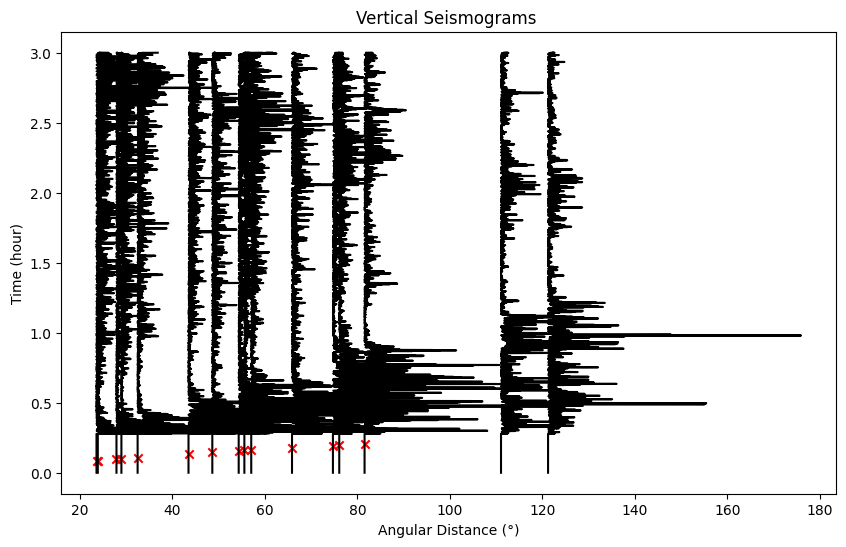

In [110]:
from obspy.signal.trigger import classic_sta_lta
fig, ax = plt.subplots(figsize=(10, 6))


  # STA/LTA parameters
sta_window = 5 # Short-term window in seconds
lta_window = 1000  # Long-term window in seconds

for i, tr in enumerate(st):
  time_shift = travel_times[i]  # Shift the time axis by the travel time
  newtr = tr.copy()[0] # some stations may have several sensors at the same site, just pick the first one.
  # filter and resample data
  newtr.filter("bandpass", freqmin=0.001, freqmax=1)
  newtr.resample(10)
  # normalize data
  newtr.data/=np.max(np.abs(newtr.data))

  # create sta/lta filter
  # newtr.taper(0.05, type='cosine')


  # Convert to sample points
  sta_samples = int(sta_window / newtr.stats.delta)
  lta_samples = int(lta_window / newtr.stats.delta)

  # Compute STA/LTA function
  impulsivity = classic_sta_lta(newtr.data, sta_samples, lta_samples)


  ax.plot(impulsivity+ang_distances[i],newtr.times()/3600, "k")  # Plot the trace with an offset for visualization
  # ax.plot(newtr.data+ang_distances[i],newtr.times()/3600, "k")  # Plot the trace with an offset for visualization

  # plot markers for the predicted arrival times of P waves
  ax.scatter(ang_distances[i], travel_times[i]/3600, marker="x", color="r")

ax.set_xlabel("Angular Distance (°)")
ax.set_ylabel("Time (hour)")
ax.set_title("Vertical Seismograms ")
plt.show()